In [1]:
# IMPORT THE NECESSARY MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORT THE DATASETS
realData = pd.read_csv('/Users/subhamsharma/Project/RealorFakeNews/True.csv', encoding = "cp1252", on_bad_lines= 'skip')
fakeData = pd.read_csv('/Users/subhamsharma/Project/RealorFakeNews/Fake.csv', encoding = "cp1252", on_bad_lines= 'skip')

In [3]:
# Add the verdict column and Merge the datasets
realData['verdict'] = 'True'
fakeData['verdict'] = 'Fake'

data = pd.concat([realData, fakeData],ignore_index=True).sample(frac=1).reset_index(drop=True)

In [4]:
data.head()

,title,text,subject,date,verdict
0,What were ex-Trump adviser Bannon's policy win...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"August 18, 2017",True
1,Hurricane Irma threatens Florida's bustling to...,NEW YORK (Reuters) - Hurricane Irma s path of ...,worldnews,"September 10, 2017",True
2,Obama says not worried about being last Democr...,LIMA (Reuters) - U.S. President Barack Obama o...,politicsNews,"November 20, 2016",True
3,Zambian president warns judges of chaos if the...,LUSAKA (Reuters) - Zambian President Edgar Lun...,worldnews,"November 3, 2017",True
4,"Storm Maria brings fear, pain and shock to Pue...","SAN JUAN, Puerto Rico (Reuters) - Miguel Cruz ...",worldnews,"September 21, 2017",True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   verdict  44897 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
data.describe()

,title,text,subject,date,verdict
count,44897,44897,44897,44897,44897
unique,38728,38645,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11271,182,23481


In [7]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
verdict    0
dtype: int64

In [8]:
data.duplicated().sum()

209

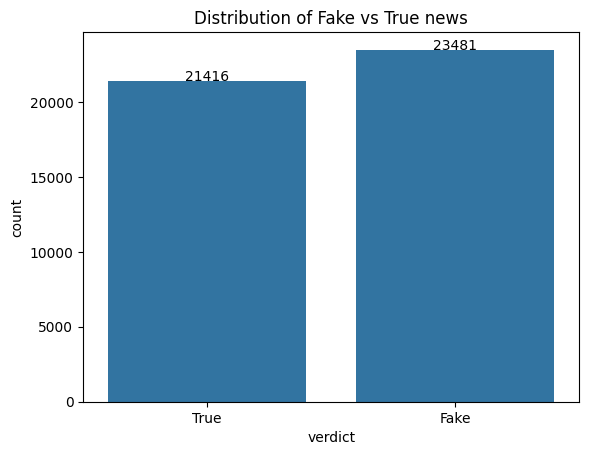

In [9]:
# Create a count plot for the target variable
ax = sns.countplot(x='verdict', data=data) 
plt.title('Distribution of Fake vs True news')
true_count = data['verdict'].value_counts()['True']
fake_count = data['verdict'].value_counts()['Fake']

ax.text(0, true_count + 1, str(true_count), ha='center')
ax.text(1, fake_count + 1, str(fake_count), ha='center')

plt.show()

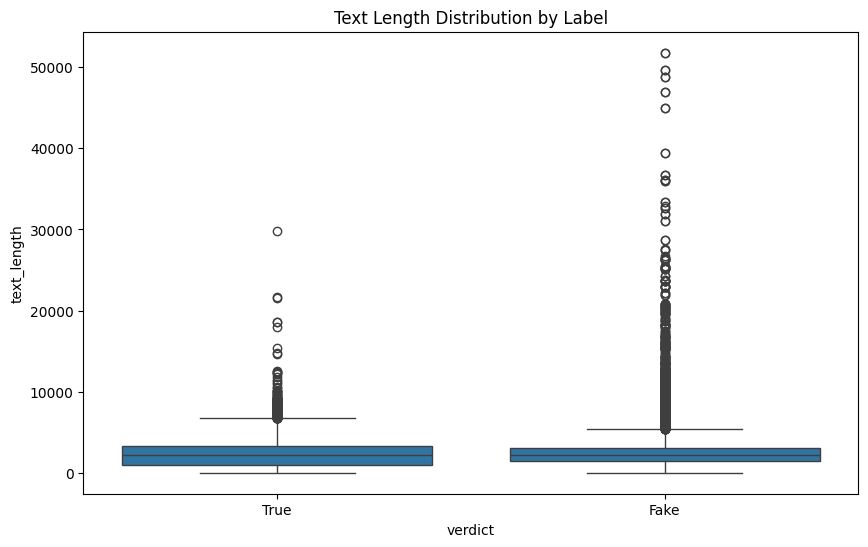

In [10]:
# Add a column for text length
data['text_length'] = data['text'].apply(len)

# Plot the text length distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='verdict', y='text_length', data=data)
plt.title('Text Length Distribution by Label')
plt.show()

In [11]:
# Display samples of True and Fake articles
print("Sample True Articles:")
print(data[data['verdict'] == 'True'].sample(5)['text'])

print("\nSample Fake Articles:")
print(data[data['verdict'] == 'Fake'].sample(5)['text'])


Sample True Articles:
10695    WASHINGTON (Reuters) - Congressional Republica...
42919    PHNOM PENH (Reuters) -  We speak our mind , sa...
22363    WASHINGTON (Reuters) - Nevada Governor Brian S...
36595    TOKYO (Reuters) - Family members of Japanese a...
38559    WASHINGTON (Reuters) - Jacobs Technology Inc w...
Name: text, dtype: object

Sample Fake Articles:
38867                                                     
17696    While Trump is busy trying to convince the wor...
16910    Donald Trump has once again decided to lie to ...
30318    No reason to deal in facts. A black man was ki...
24402    What s a million dollars between friends? To h...
Name: text, dtype: object


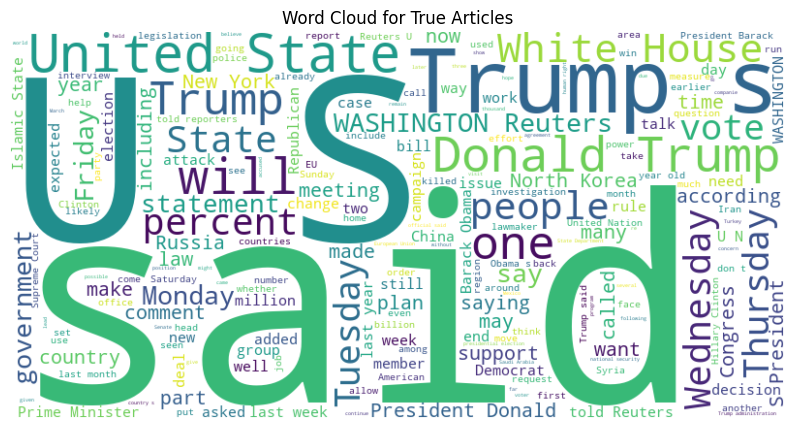

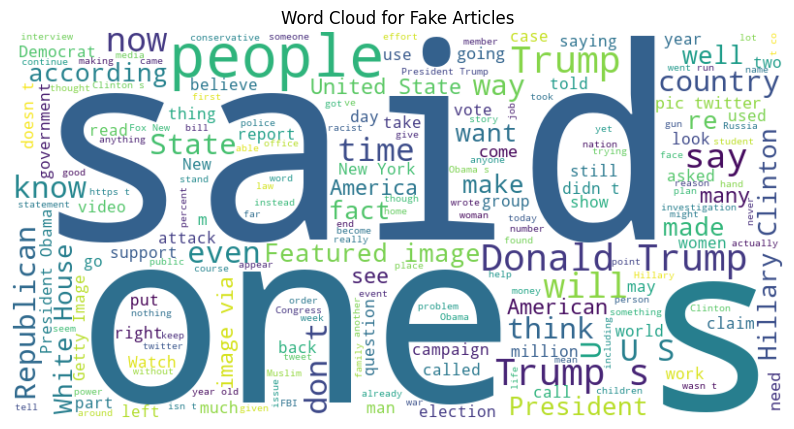

In [12]:
from wordcloud import WordCloud

# Generate a word cloud for the articles
true_text = ' '.join(data[data['verdict'] == 'True']['text'])
fake_text = ' '.join(data[data['verdict'] == 'Fake']['text'])

# Word cloud for True articles
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True Articles')
plt.show()

# Word cloud for Fake articles
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake Articles')
plt.show()


In [13]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Text cleaning function
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,WASHINGTON (Reuters) - President Donald Trump ...,washington reuters president donald trump frid...
1,NEW YORK (Reuters) - Hurricane Irma s path of ...,new york reuters hurricane irma path destructi...
2,LIMA (Reuters) - U.S. President Barack Obama o...,lima reuters us president barack obama sunday ...
3,LUSAKA (Reuters) - Zambian President Edgar Lun...,lusaka reuters zambian president edgar lungu w...
4,"SAN JUAN, Puerto Rico (Reuters) - Miguel Cruz ...",san juan puerto rico reuters miguel cruz awoke...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
vectoriz = CountVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Fit and transform the cleaned text
X_count = vectoriz.fit_transform(data['cleaned_text'])

# Convert to a DataFrame for better readability
vectoriz_df = pd.DataFrame(X_count.toarray(), columns=vectoriz.get_feature_names_out())


display(vectoriz_df.head())


,10,100,1000,10000,100000,11,12,13,14,15,...,younger,youth,youtube,zealand,zero,zika,zimbabwe,zone,zones,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import numpy as np

# Get the sum of Count Vectorizer values for each word (column)
word_importance = np.array(vectoriz_df.sum(axis=0)).flatten()

# Create a DataFrame with word importance
importance_df = pd.DataFrame({'word': vectoriz.get_feature_names_out(), 'importance': word_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Display top 10 important words
print(importance_df.head(10))


           word  importance
3950       said      130049
4663      trump      127682
4755         us       63159
4967      would       54936
3437  president       51949
3286     people       41200
3132        one       35568
4283      state       32252
288        also       31174
3039        new       30919


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_count, data['verdict'], test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape)


(35917, 5000) (8980, 5000)


In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9966592427616926

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4693
        True       1.00      1.00      1.00      4287

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],        # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear']         # Solver that supports both penalties
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9961577997356417


In [21]:
# Best model from grid search
best_log_reg = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_log_reg.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Optimized Accuracy: 0.9968819599109131

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4693
        True       1.00      1.00      1.00      4287

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9988864142538976

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4693
        True       1.00      1.00      1.00      4287

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
}

# Initialize GridSearchCV
grid_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Fit the model with grid search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
Best Cross-Validation Accuracy: 0.9969652075380904


In [25]:
# Best Random Forest model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf_best = best_rf_model.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))


Optimized Random Forest Accuracy: 0.9969933184855234

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4693
        True       1.00      1.00      1.00      4287

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [26]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)


MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9528953229398663

Classification Report:
               precision    recall  f1-score   support

        Fake       0.97      0.94      0.95      4693
        True       0.94      0.97      0.95      4287

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [28]:
# Compare accuracy of different models
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred),          # Logistic Regression accuracy
    accuracy_score(y_test, y_pred_rf),       # Random Forest accuracy
    accuracy_score(y_test, y_pred_nb)        # Naive Bayes accuracy
]

# Display the comparison
for model, acc in zip(models, accuracies):
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.9967
Random Forest: 0.9989
Naive Bayes: 0.9529


In [29]:
# Define a random text input
input_text = "Fox News host Sean Hannity is having a Twitter meltdown after Time called out Donald Trump for claiming that the magazine called him regarding the Person of the Year award and that he declined the offer.Time magazine corrected Trump in a tweet, writing,  The President is incorrect about how we choose Person of the Year. TIME does not comment on our choice until publication, which is December 6. The magazine calling out Trump was too much to bear for Trump cult member Sean Hannity who called it  bullshit  just hours after Time denied the former reality show star s bizarre claim. I call total Bullshit on Time. Answer the question; did you or did you not call the WH and say @realDonaldTrump @POTUS was being considered for person of the year and ask for an interview?  Hannity tweeted Friday.I call total Bullshit on Time. Answer the question; did you or did you not call the WH and say @realDonaldTrump @POTUS was being considered for person of the year and ask for an interview? https://t.co/DaqfDBsr0V  Sean Hannity (@seanhannity) November 25, 2017And again.So @Time is worse than Fake News @CNN. The coming ice age,  The Big Cool  ha. https://t.co/mppoFtFsvc  Sean Hannity (@seanhannity) November 25, 2017Sean really wants the magazine s attention.Waiting  https://t.co/90GSYMVVKU  Sean Hannity (@seanhannity) November 25, 2017Twitter users, of course, are calling out Liddle Sean.You re questioning Time? Why aren t you questioning the man who hung fake Time covers of himself in his resorts? It s sad you haven t caught on to his lies yet, Sean.  Mrs. SMH (@MaraLaGoFuckYou) November 25, 2017pic.twitter.com/UJtVSaKgOF  What the Fork (@WhattheForkLLC) November 25, 2017Only the finest make it on @TIME @POTUS44 @MichelleObama pic.twitter.com/fGLX2Rzgwo  NAT (@N_A_T_39) November 25, 2017LMAO! Let s look at this logically. @Time magazine has been in business 93 years. It s never gone bankrupt. It s a respected institution.@realdonaldtrump has gone bankrupt 4 times, has been caught in scores of lies including a fake Time cover mounted on his golf club walls. pic.twitter.com/ywzr96arh1  Annalise   Brown (@SWFLib) November 25, 2017Donnie can t stand the idea of Obama being Time s Man of the Year in the first year of his presidency. He knows he ll never be half the man or the President @BarackObama was, and it s eating him up inside. pic.twitter.com/ROMxC3oc7C  Annalise   Brown (@SWFLib) November 25, 2017As this woman notes, Trump has always been obsessed with Time magazine.Honey, just get the man warm milk and one for yourself Also. pic.twitter.com/LMV9lwg9Lx  kastherine (@Mercedes8_S) November 25, 2017Find a comfy chair. Drink some warm milk. And wait for the voices to stop.  Charles P. Pierce (@CharlesPPierce) November 25, 2017With Trump s history, a man who literally hangs photoshopped Time magazine covers featuring his big stupid face, on the walls of at least 4 of his golf courses, we re pretty it s not Time magazine who is lying.Photo by Rob Kim/Getty Images."

# Preprocess the input text using the same cleaning function
cleaned_input = clean_text(input_text)  # Using the same cleaning function we defined earlier

# Vectorize the input text using the trained Count vectorizer
input_vector = vectoriz.transform([cleaned_input])

# Make a prediction with the trained Naive Bayes model (or use the model of your choice)
predicted_label = best_rf_model.predict(input_vector)


print(f"The predicted label for the input text is: {predicted_label[0]}")


The predicted label for the input text is: Fake


In [30]:
import joblib

# Save the trained model and the vectorizer
joblib.dump(best_rf_model, 'model.pkl')
joblib.dump(vectoriz, 'vectorizer.pkl')

['vectorizer.pkl']